# Cryptomatte Decoder

In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat

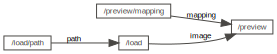

INFO:imagecat.operator:Task /load load:
INFO:imagecat.operator:  layers: *
INFO:imagecat.operator:  path: bunny_CryptoMaterial.exr
INFO:imagecat.operator:  output: Image(uCryptoMaterial.blue: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial.green: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial.red: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial00.alpha: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial00.blue: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial00.green: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial00.red: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial01.alpha: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial01.blue: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial01.green: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial01.red: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial02.alpha: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial02.blue: Layer(Role.NONE 1280x720x1 float32), uCryptoMaterial02.green: Layer(Role.NONE

In [2]:
mapping = {
    "CryptoPreview": {"role": imagecat.data.Role.RGB, "selection": ["uCryptoMaterial.red", "uCryptoMaterial.green", "uCryptoMaterial.blue"]},
}

graph = graphcat.DynamicGraph()
imagecat.add_task(graph, "/load", imagecat.operator.load, path="bunny_CryptoMaterial.exr")
imagecat.add_task(graph, "/preview", imagecat.operator.remap, mapping=mapping)
imagecat.add_links(graph, "/load", ("/preview", "image"))

graphcat.notebook.display(graph)
image = graph.output("/preview")

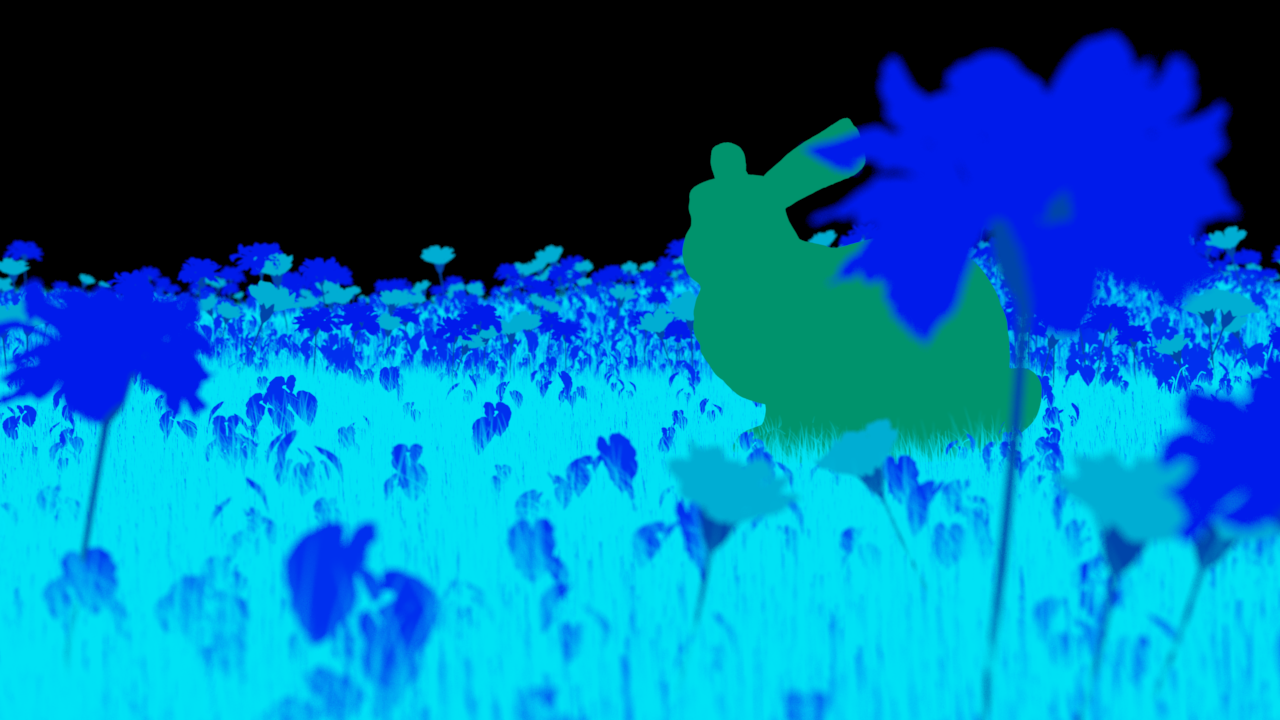

In [3]:
image.layers["CryptoPreview"]

In [4]:
graph.output("/load").metadata

{'CameraFilmApertureHorizontal': 1.0,
 'CameraFilmApertureVertical': 0.5625,
 'CameraFocalLength': 0.9890166521072388,
 'arnold/AA_samples': 10,
 'arnold/auto_transparency_depth': 10,
 'arnold/diffuse_depth': 1,
 'arnold/diffuse_samples': 0,
 'arnold/glossy_depth': 1,
 'arnold/glossy_samples': 0,
 'arnold/host/hw': '2 x Intel(R) Xeon(R) CPU E5645 @ 2.40GHz (12 cores, 24 logical) with 24567MB',
 'arnold/host/name': 'NYMRNDR108',
 'arnold/host/os': 'Windows 7 Professional Service Pack 1 (version 6.1, build 7601)',
 'arnold/reflection_depth': 2,
 'arnold/refraction_depth': 2,
 'arnold/refraction_samples': 0,
 'arnold/sss_samples': 3,
 'arnold/stats/date': 'Tue Mar 01 19:29:05 2016',
 'arnold/stats/geo/curve_segments': 1095000.0,
 'arnold/stats/geo/triangles': 125766.0,
 'arnold/stats/memory/peak': 8468.72265625,
 'arnold/stats/memory/start': 367.5078125,
 'arnold/stats/rays/all/pixel': 1062.9029541015625,
 'arnold/stats/rays/all/total': 1043855808.0,
 'arnold/stats/rays/camera/pixel': 96.

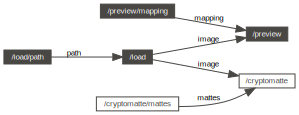

INFO:imagecat.operator.cryptomatte:Task /cryptomatte cryptomatte.decode:
INFO:imagecat.operator.cryptomatte:  cryptomatte: None
INFO:imagecat.operator.cryptomatte:  layer: M
INFO:imagecat.operator.cryptomatte:  mattes: ['bunny_porcelain_mat']
INFO:imagecat.operator.cryptomatte:  output: Image(M: Layer(Role.MATTE 1280x720x1 float32))


In [5]:
imagecat.add_task(graph, "/cryptomatte", imagecat.operator.cryptomatte.decoder, mattes=["bunny_porcelain_mat"])
imagecat.add_links(graph, "/load", ("/cryptomatte", "image"))

graphcat.notebook.display(graph)
image = graph.output("/cryptomatte")

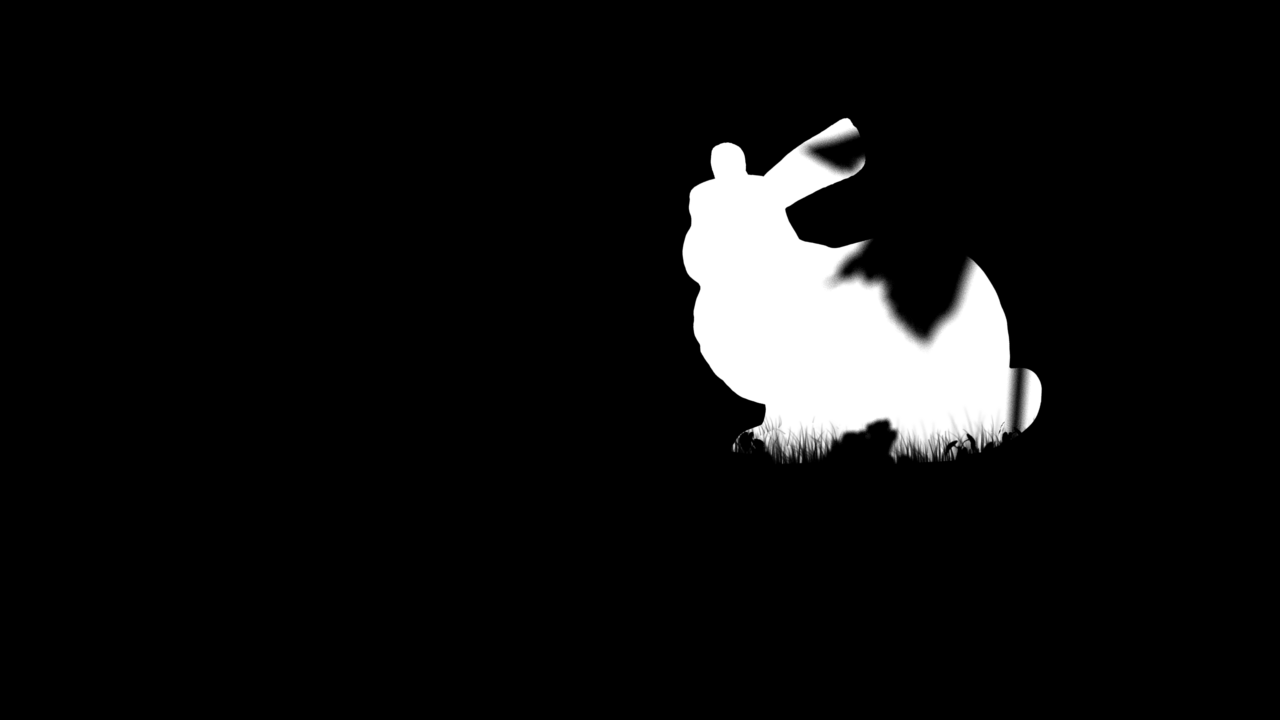

In [6]:
image.layers["M"]

In [7]:
graph.set_task("/cryptomatte/mattes", graphcat.constant(["flowerA_petal", "flowerB_petal"]))
image = graph.output("/cryptomatte")

INFO:imagecat.operator.cryptomatte:Task /cryptomatte cryptomatte.decode:
INFO:imagecat.operator.cryptomatte:  cryptomatte: None
INFO:imagecat.operator.cryptomatte:  layer: M
INFO:imagecat.operator.cryptomatte:  mattes: ['flowerA_petal', 'flowerB_petal']
INFO:imagecat.operator.cryptomatte:  output: Image(M: Layer(Role.MATTE 1280x720x1 float32))


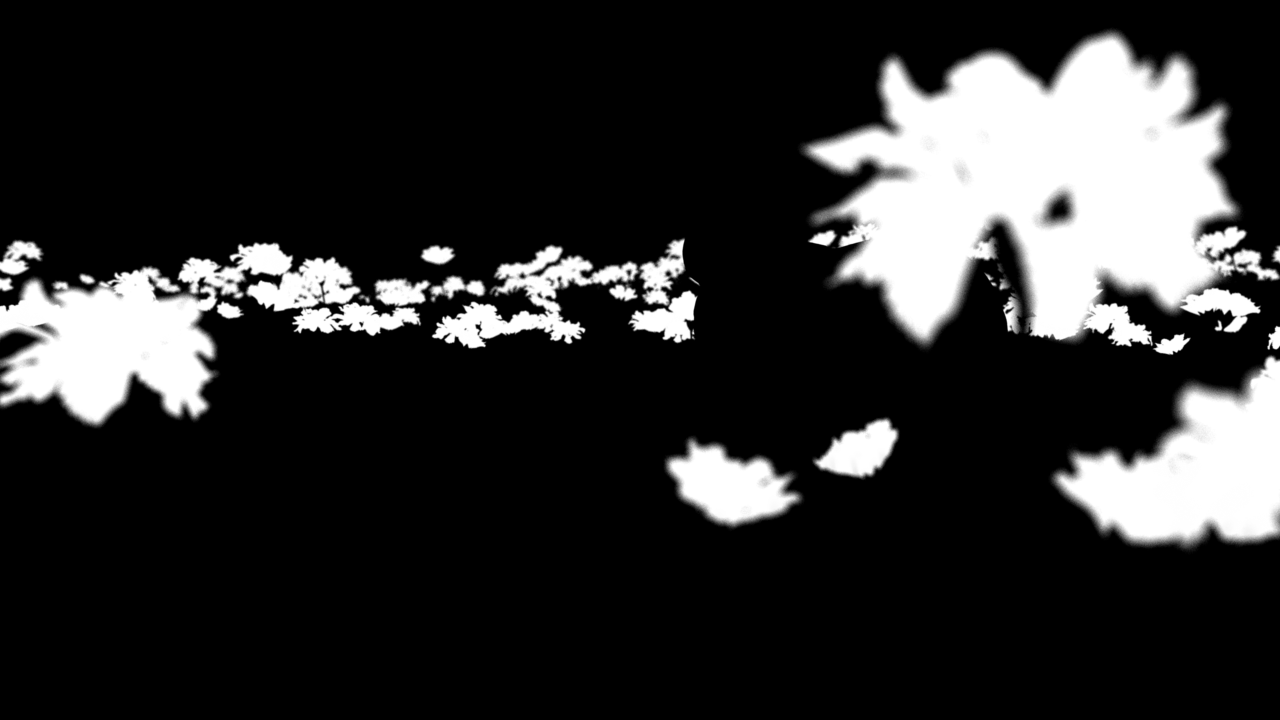

In [8]:
image.layers["M"]